In [7]:
#Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Import and Explore the dataset
netflix=pd.read_csv("netflix_titles.csv")

In [41]:
# First Five rows of the dataframe
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [42]:
# No. of rows and columns
netflix.shape

(8808, 12)

In [43]:
# To show No of total values and elements in the dataframe
netflix.size

105696

In [44]:
# columns in the Dataframe
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [45]:
# #To show the Datatype of each column
netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [46]:
#To show all Entries Rows and Columns, no. of Null values and datatypes of each columns, memory at once
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8808 non-null   object
 1   type          8808 non-null   object
 2   title         8808 non-null   object
 3   director      6174 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8798 non-null   object
 7   release_year  8808 non-null   int64 
 8   rating        8804 non-null   object
 9   duration      8805 non-null   object
 10  listed_in     8808 non-null   object
 11  description   8808 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.9+ KB


In [47]:
# To check the nunique values 
netflix.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [48]:
#Checking the duplicates value in dataframe
netflix.duplicated().sum()

1

In [49]:
# To Find the Duplicated value
netflix[netflix.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8807,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...


In [50]:
# Drop the Duplicates Values
netflix.drop_duplicates(inplace=True)

In [51]:
# Rechecking the Duplicated value
netflix.duplicated().sum()

0

In [52]:
# Checking the how many Null Values in each columns
netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [53]:
# To check the null values in each column in percentages
round(netflix.isnull().sum()/netflix.shape[0]*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [54]:
# Replace the null values in columns (director, country, cast, Date_added, rating, duration,)

In [55]:
netflix["director"].replace(np.NaN, "No Director",inplace=True)
netflix["cast"].replace(np.NaN,"No Cast",inplace=True)
netflix["country"].replace(np.NaN, "UnKnown",inplace=True)

In [56]:
netflix["date_added"]=netflix["date_added"].fillna(netflix["date_added"].mode()[0])
netflix["rating"].replace(np.NaN, "Unknown",inplace=True)
netflix["duration"]=netflix["duration"].fillna(netflix["duration"].mode()[0])

In [57]:
# now Recheking the null values
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [58]:
netflix[netflix["director"]=="No Director"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",No Director,No Cast,UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,s15,TV Show,Crime Stories: India Detectives,No Director,No Cast,UnKnown,"September 22, 2021",2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,No Director,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,No Director,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,No Director,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,No Director,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [59]:
# Recheck the unknown values 
netflix[netflix["country"]=="UnKnown"].shape[0]

831

In [60]:
netflix[netflix["country"].isnull()].shape[0]

0

In [61]:
netflix.shape

(8807, 12)

In [62]:
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [45]:
#now Change the Columns names
netflix.rename(columns={"listed_in":"Genre"}, inplace=True)

In [64]:
netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,4,TV Show,Jailbirds New Orleans,No Director,No Cast,UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [65]:
# to remove unwanted text from title column
netflix['title'] = netflix['title'].str.strip()

In [66]:
netflix['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

# Additional Data Cleaning duration column data input error

In [67]:
# check to make sure there is no other content with the same director to avoid accidental overwrite.
netflix[netflix["director"]=="Louis C.K."]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,1 Season,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,1 Season,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,1 Season,Movies,The comic puts his trademark hilarious/thought...


In [68]:
# Overwrite the rating and duration columns, rating values convert to  duration and check
# Loc helps us Early accessing the columns by names
netflix.loc[netflix["director"]== "Louis C.K.", "duration"]= netflix["rating"]
netflix[netflix["director"]=="Louis C.K."]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [69]:
# Second Overwrite and check 
netflix.loc[netflix["director"]=="Louis C.K.", "rating"] = "Unknown"
netflix[netflix["director"]=="Louis C.K."]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Unknown,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Unknown,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Unknown,66 min,Movies,The comic puts his trademark hilarious/thought...


# Exploratory Data Analysis (EDA) with Visualisations

In [70]:
# first three rows of the dataframe
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [139]:
# last three rows of the dataframe
netflix.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
8804,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,11/01/2019,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,01/11/2020,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,03/02/2019,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [194]:
# extract: total entries (rows) & columns, column names, no. of non-null and data types in columns and memory
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  Genre         8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [164]:
#no. of rows and columns
netflix.shape

(8807, 12)

In [165]:
# columns in the dataframe
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Genre', 'description'],
      dtype='object')

In [166]:
# how many null values in the data set?
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
Genre           0
description     0
dtype: int64

In [169]:
# index into the first value in the show_id rows to check whether id values begin with 's'.
netflix["show_id"].str[0].value_counts()

show_id
     8807
Name: count, dtype: int64

In [171]:
# There are no missing values 
netflix["type"].count()

8807

In [172]:
# Index into column and show unique values 
netflix["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [173]:
# Show the frequency of content types, i.e, ratio of movies to tv shows using value_counts
# This also confirms there are no null values in this column
netflix["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [176]:
# percentage of movies = no.of movies / length of df * 100. Values are then rounded 
percentage_movies  = round(len(netflix[netflix['type'] == 'Movie']) / len(netflix) *100, 2)
percentage_movies

69.62

In [ ]:
# 69.69% of the content type in the Netflix dataset are movies.

In [178]:
# There are 3 titles that are duplicated (8790-8787).
netflix["title"].nunique()

8803

In [179]:
# return the titles that are duplicates.
netflix["title"].value_counts()

title
Consequences                              2
Feb-09                                    2
22-Jul                                    2
15-Aug                                    2
Marco Polo: One Hundred Eyes              1
                                         ..
Captain Underpants Epic Choice-o-Rama     1
We Bare Bears                             1
To All the Boys: P.S. I Still Love You    1
French Toast                              1
Zubaan                                    1
Name: count, Length: 8803, dtype: int64

In [180]:
# show the duplicate titles 
netflix[netflix["title"]=="Feb-09"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
3996,3997,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",UnKnown,03/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
5964,5965,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",UnKnown,03/20/2019,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [181]:
# show the duplicate titles 
netflix[netflix["title"]=="22-Jul"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
4522,4523,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",10/10/2018,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5965,5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",10/10/2018,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."


In [182]:
# show the duplicate titles
* Duplicate titles will need to be removed
netflix[netflix["title"]=="15-Aug"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
3962,3963,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,03/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
5966,5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,03/29/2019,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."


In [185]:
# 'director' column
netflix['director'].count()

8807

In [186]:
# No. of unique directors in the dataset
netflix['director'].nunique()


4529

In [187]:
# Rajiv Chilaka directed the highest number of content (either movies or tv shows)
netflix["director"].value_counts()

director
No Director                       2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [198]:
# show first 5 movies directed by Rajiv Chilaka. 
netflix[netflix["director"]=="Rajiv Chilaka"].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
406,407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",UnKnown,07/22/2021,2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",UnKnown,07/22/2021,2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",UnKnown,07/22/2021,2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",UnKnown,07/22/2021,2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,07/22/2021,2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...


In [200]:
# show the rows with missing directors.
netflix[netflix["director"]=="No Director"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description
1,2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,09/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,4,TV Show,Jailbirds New Orleans,No Director,No Cast,UnKnown,09/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,09/24/2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
10,11,TV Show,"Vendetta: Truth, Lies and The Mafia",No Director,No Cast,UnKnown,09/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
14,15,TV Show,Crime Stories: India Detectives,No Director,No Cast,UnKnown,09/22/2021,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,8796,TV Show,Yu-Gi-Oh! Arc-V,No Director,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",05/01/2018,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,8797,TV Show,Yunus Emre,No Director,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,01/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,8798,TV Show,Zak Storm,No Director,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",09/13/2018,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,8801,TV Show,Zindagi Gulzar Hai,No Director,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [202]:
# Calculate missing directors
percentage_directors= round(len(netflix[netflix["director"]=="No Director"])/len (netflix)*100,2)
percentage_directors

29.91

In [10]:
# Count method does not indicate any missing values, therefore use value_counts.
netflix['country'].count()

7976

In [26]:
# Majority of the content was produced in the USA (2818), followed by India (972) and UK (419).
netflix['country'].value_counts().head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [28]:
# data is based on 748 different countries
netflix["country"].nunique()

748

In [38]:
# date_added' column
netflix[['date_added']].head(10)

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"
6,"September 24, 2021"
7,"September 24, 2021"
8,"September 24, 2021"
9,"September 24, 2021"


In [65]:
# convert the column to datetime and show first 5 rows.
date_format = "%B %d, %Y"
netflix["date_addeddate_added"]= pd.to_datetime(netflix["date_added"], format=date_format, errors='coerce')
netflix["date_added"].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [66]:
# Now that the column has been converted, we can perform descriptive statistics.
netflix[['date_added']].describe()


,date_added
count,8710
mean,2019-05-23 04:06:30.172216064
min,2008-01-01 00:00:00
25%,2018-04-20 00:00:00
50%,2019-07-12 00:00:00
75%,2020-08-26 00:00:00
max,2021-09-25 00:00:00


# 'release_year' column

In [67]:
# Top 10 release years
netflix["release_year"].value_counts().head(10)

release_year
2018    1147
2017    1032
2019    1030
2020     954
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

In [71]:
# As most of the data is non numerical, descriptive statistics for numerical data is limited
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


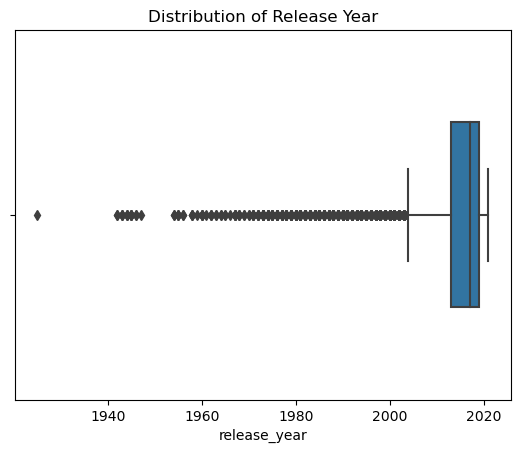

In [72]:
# As we are dealiplt.figure(figsize=(10, 6))
sns.boxplot(x=netflix['release_year'], width=0.5);
plt.title('Distribution of Release Year')
plt.show() 


# 'rating' column

In [73]:
# There is no missing data
netflix['rating'].count()

8804

In [74]:
# There are 14 unique ratings
netflix['rating'].nunique()

17

In [75]:
# Unique ratings 
netflix['rating'].value_counts()

rating
TV-MA       3208
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

# 'duration' column


In [78]:
# There seems to be no missing data
netflix['duration'].count()

8805

In [79]:
netflix["duration"].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [89]:
netflix['duration'].isnull().sum()

0

In [90]:
# There are 220 different durations in the dataset, 1 season occuring most frequently (1791).
netflix['duration'].value_counts()


duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [91]:
netflix['duration'].describe()


count         8808
unique         220
top       1 Season
freq          1793
Name: duration, dtype: object

In [102]:
# Longest movie is 99 minutes 
netflix[netflix['type'] == 'Movie']['duration'].max()

'99 min'

In [104]:
# There are 118 movies that are 99 minutes long
netflix[netflix['duration'] == '99 min'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,date_addeddate_added
51,52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,2021-09-15,2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu...",2021-09-15
52,53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,2021-09-15,2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...,2021-09-15
119,120,Movie,Here and There,JP Habac,"Janine Gutierrez, JC Santos, Victor Anastacio,...",NaN,2021-09-02,2020,TV-MA,99 min,"Dramas, International Movies, Romantic Movies",After meeting through a heated exchange on soc...,2021-09-02
337,338,Movie,Good Luck Chuck,Mark Helfrich,"Dane Cook, Jessica Alba, Dan Fogler, Ellia Eng...","United States, Canada",2021-08-01,2007,R,99 min,"Comedies, Romantic Movies","Every time Chuck breaks up with a girlfriend, ...",2021-08-01
344,345,Movie,My Girl 2,Howard Zieff,"Anna Chlumsky, Austin O'Brien, Dan Aykroyd, Ja...",United States,2021-08-01,1994,PG,99 min,"Children & Family Movies, Comedies, Dramas",A teen makes surprising discoveries when she t...,2021-08-01


In [105]:
# Shortest Movie is 10 min
netflix[netflix['type'] == 'Movie']['duration'].min()

'10 min'

In [109]:
# Shortest movie is listed as a documentary.
netflix[netflix["duration"]=="10 min"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,date_addeddate_added
3535,3536,Movie,American Factory: A Conversation with the Obamas,NaN,"President Barack Obama, Michelle Obama, Julia ...",United States,2019-09-05,2019,TV-G,10 min,Documentaries,Barack and Michelle Obama talk with directors ...,2019-09-05


In [110]:
# Longest TV Show/s had 9 seasons 
netflix[netflix['type'] == 'TV Show']['duration'].max()


'9 Seasons'

In [113]:
# There are 9 TV Shows that are 9 seasons long, majority of which were produced in USA
netflix[netflix["duration"]== "9 Seasons"].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,date_addeddate_added
8,9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24
67,68,TV Show,Saved by the Bell,NaN,"Mark-Paul Gosselaar, Tiffani Thiessen, Mario L...",United States,2021-09-15,1994,TV-PG,9 Seasons,"Kids' TV, TV Comedies","From middle school to college, best friends Za...",2021-09-15
1480,1481,TV Show,Still Game,NaN,"Ford Kiernan, Paul Riley, Jane McCarry, Greg H...",United Kingdom,2020-12-30,2018,TV-14,9 Seasons,"British TV Shows, Classic & Cult TV, Internati...",Scottish pensioners Jack and Victor make the m...,2020-12-30
1701,1702,TV Show,American Horror Story,NaN,"Evan Peters, Sarah Paulson, Jessica Lange, Den...",United States,2020-11-13,2019,TV-MA,9 Seasons,"TV Horror, TV Mysteries, TV Thrillers",This twisted Emmy-winning drama plays upon the...,2020-11-13
1998,1999,TV Show,Call the Midwife,Philippa Lowthorpe,"Vanessa Redgrave, Bryony Hannah, Helen George,...",United Kingdom,2020-09-15,2020,TV-MA,9 Seasons,"British TV Shows, International TV Shows, TV D...",This period drama set in impoverished East Lon...,2020-09-15


In [114]:
# Shortest TV Show had 1 season.
netflix[netflix['type'] == 'TV Show']['duration'].min()


'1 Season'

In [119]:
# 1791 TV Shows had 1 season.
netflix[netflix["duration"]== "1 Season"].head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,date_addeddate_added
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
5,6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021-09-24
10,11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",2021-09-24
11,12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",2021-09-23


# 'listed_in' column

In [6]:
# There seems to be no missing values 
netflix['listed_in'].count()

8808

In [9]:
# No missing data 
netflix[netflix["listed_in"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [11]:
# majority of the content in the data set is based on Dramas, Documentaries and Comedy.
netflix["listed_in"].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [12]:
# There is an exhaustive list of genres
netflix["listed_in"].nunique()

514

# Descriptive Statistics on non numerical columns


In [72]:
# descriptive statistics on non numerical (object) columns
netflix.describe(include=['O'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8803,4529,7693,749,1767,15,220,514,8775
top,1,Movie,Consequences,No Director,No Cast,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,2634,825,2818,119,3207,1793,362,4


# Data types in the dataset


In [24]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.5+ KB


# Data Manipulation and Cleaning
Apply functions to column and set show_id as index
remove duplicate titles (3)
convert 'not given' to unknown for 'country' and 'director' columns
convert column data types

# Apply function to 'show_id' and set as the Index


In [73]:
# 's' has been renived from the column.
netflix["show_id"]=netflix["show_id"].str.replace("s"," ")

In [75]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [78]:
# set show_id as the index and save to original data frame
netflix.set_index(['show_id'], inplace=True)

In [79]:
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


# Converting column data types


In [81]:
netflix.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [84]:
# select the columns and assign to new variable 
categorical_columns = ['type', 'country', 'rating']

In [85]:
# Change the column type and assign it to the dataframe
netflix[categorical_columns] = netflix[categorical_columns].astype('category')

In [93]:
# convert the column to datetime and show first 5 rows.
netflix['date_added'] = pd.to_datetime(netflix['date_added'], 
                                       errors='coerce')
netflix['date_added'].head()

show_id
 1   2021-09-25
 2   2021-09-24
 3   2021-09-24
 4   2021-09-24
 5   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [91]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries,  1 to  8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   category      
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   category      
 5   date_added    8719 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   category      
 8   duration      8807 non-null   object        
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: category(3), datetime64[ns](1), int64(1), object(6)
memory usage: 676.4+ KB


# Netflix Content Type Overview

Type of Content streamed on Netflix and its Distribution

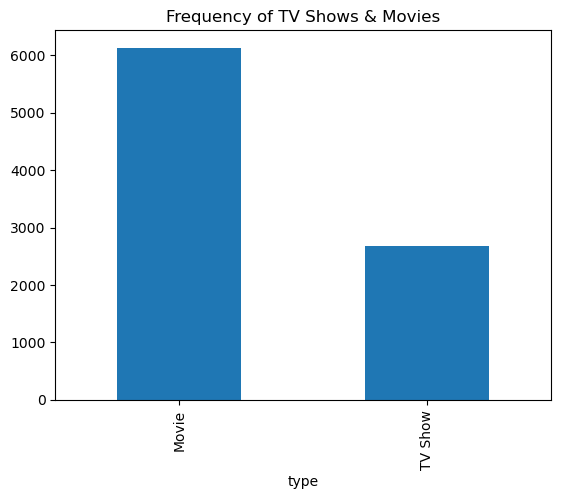

In [95]:
# Visualise content (TV Shows and Movies), categorical data using a bar chart.
netflix['type'].value_counts().plot(kind='bar', title='Frequency of TV Shows & Movies');

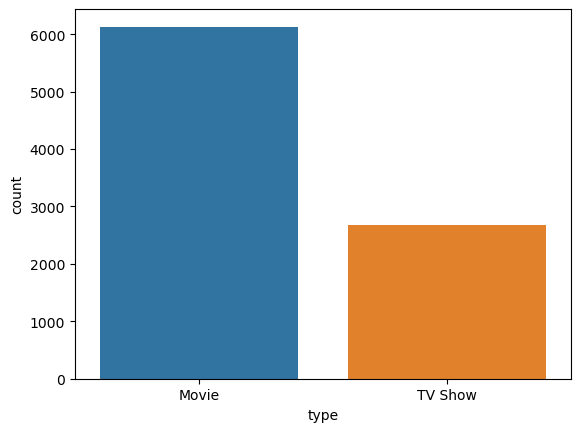

In [96]:
# Countplot dispays categorical data
sns.countplot(netflix, x=netflix['type']);

In [98]:
# Calculate percentage of Movies
percentage_movie = round((len(netflix[netflix['type'] == 'Movie']) / len(netflix['type']))*100, 2)
percentage_movie

69.62

In [100]:
# Calculate percentage TV Shows
percentage_movie = round((len(netflix[netflix['type'] == 'TV Show']) / len(netflix['type']))*100, 2)
percentage_movie

30.38

# Top countries contributing to the content on Netflix

Countries producing the highest amount of content (Movies or TV Shows)

In [101]:
# Total number of countries producing content
netflix['country'].nunique()

749

In [104]:
# Top 10 countries producing content, excluding 'Unknown' countries.
top_10_countries = netflix['country'].value_counts().head(11).drop('UnKnown')
top_10_countries

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

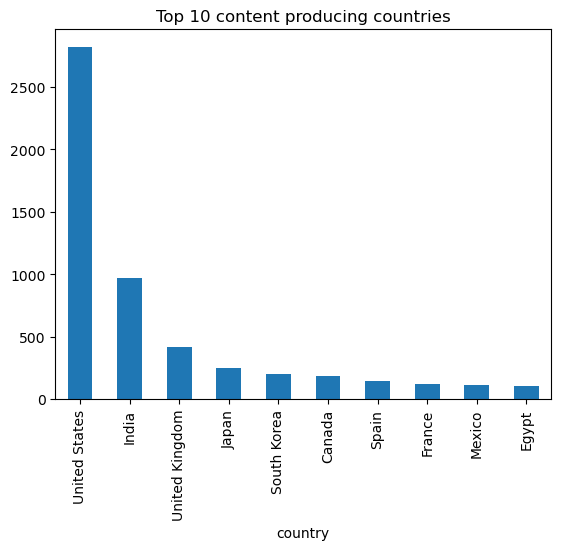

In [105]:
# Plot a bar chart
top_10_countries.plot(kind='bar', title='Top 10 content producing countries');

# Diversity of Movie content on Netflix

Exploration of the top ten countries that have contibuted towards the movie content on Netflix.

In [106]:
# Use data that does not contain unknown countries.
countries_movies = netflix[netflix['country'] != 'Unknown'].groupby(['type'])['country'].value_counts().head(10)
countries_movies

type   country       
Movie  United States     2058
       India              893
       UnKnown            440
       United Kingdom     206
       Canada             122
       Spain               97
       Egypt               92
       Nigeria             86
       Indonesia           77
       Turkey              76
Name: count, dtype: int64

In [ ]:
Note: Pakistan is no longer part of this group as the country is not producing movies. Pakistan therefore, must be producing a huge proportion of TV Shows.

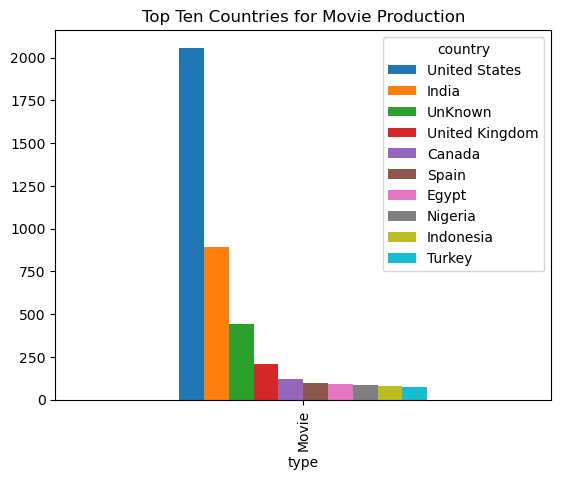

In [107]:
# Bar chart will show the frequency of movies produced per country
countries_movies.unstack().sort_values(by='type').plot(kind='bar', title='Top Ten Countries for Movie Production');

In [109]:
# Contribution of movies from the US
movies_united_states = netflix[netflix['type'] == 'Movie'][['country']].value_counts()[0]
movies_united_states

2058

In [111]:
# Total number of movies contributed
total_movies = len(netflix[netflix['type'] == 'Movie'])
total_movies

6131

In [117]:
# US movie contribution as a percentage 
movie_industry_us = round((movies_united_states/ total_movies)*100, 2)
movie_industry_us

33.57

In [118]:
movies_india = netflix[netflix['type'] == 'Movie'][['country']].value_counts()[1]
movie_industry_india = round((movies_india/ total_movies)*100, 2)
movie_industry_india

14.57

In [ ]:
India contributed 15.92 % towards the movie content.

In [119]:
movies_uk = netflix[netflix['type'] == 'Movie'][['country']].value_counts()[2]
movie_industry_uk = round((movies_uk/ total_movies)*100, 2)
movie_industry_uk

7.18

In [ ]:
UK contributed 6.32 % towards the movie content. (as streamed on Netflix).

# Diversity of TV content on Netflix


In [122]:
# Filter the original dataframe to show
tvshow = netflix[netflix['type'] == 'TV Show']
tvshow.head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,TV Show,Jailbirds New Orleans,No Director,No Cast,UnKnown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",UnKnown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [124]:
# There are 2676 rows / TV Shows.
len(tvshow)

2676

In [125]:
# 197 countries produced TV Show content (2676 TV Shows).
countries_tvshow = tvshow['country'].nunique()
countries_tvshow


197

In [126]:
# 27 countries have not produced TV Shows. 
countries_no_tvshow = tvshow['country'].value_counts().tail(27).count()
countries_no_tvshow

27

In [127]:
# Show the 27 countries that have not produced TV Shows in the Netflix dataset. 
tvshow['country'].value_counts().tail(27)


country
Italy, Belgium                                                                         0
Italy, Brazil, Greece                                                                  0
Italy, France                                                                          0
Italy, France, Switzerland                                                             0
Italy, India                                                                           0
Italy, Switzerland, Albania, Poland                                                    0
Italy, Switzerland, France, Germany                                                    0
Ireland, United Kingdom                                                                0
Ireland, Switzerland, United Kingdom, France, United States                            0
Ireland, South Africa                                                                  0
Ireland, Luxembourg, Belgium                                                           0
India, Turkey

In [128]:
netflix[netflix['country'] == 'West Germany']


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
5613,Movie,Hitler - A Career,"Joachim Fest, Christian Herrendoerfer",No Cast,West Germany,2017-02-10,1977,TV-MA,150 min,"Documentaries, International Movies",This documentary examines how Adolf Hitler's t...


In [129]:
netflix[netflix['country'] == 'Soviet Union']


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


In [130]:
# Countries that have not produced any content are not part of this dataset. 
tvshow[tvshow['country'] == 'Cambodia']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


In [131]:
# There are no 'Unknown' countries
len(tvshow[tvshow['country'] == 'Uknown'])


0

In [132]:
# 1994 out of 2663 tv shows are produced by the top ten countries
top10_total_tvshows = tvshow['country'].value_counts()[0:10].sum()
top10_total_tvshows

1994

In [133]:
# 74.51% of TV Shows are produced by the top ten countries.
percentage_tvshow_top10 = round((top10_total_tvshows / len(tvshow))*100, 2)
percentage_tvshow_top10

74.51

In [134]:
#Index into the top ten countries producing tv shows. 
# There are no unknown countries in the list. 

countries_tvshows_top10 = tvshow['country'].value_counts()[0:10]
countries_tvshows_top10

country
United States     760
UnKnown           391
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Name: count, dtype: int64

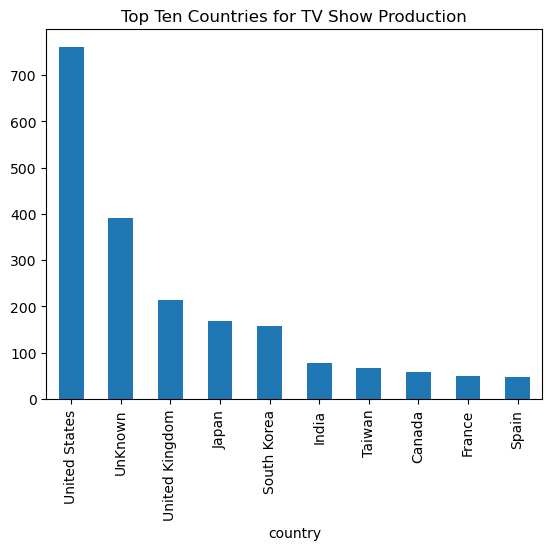

In [135]:
# Plot the data on a barchart
countries_tvshows_top10.plot(kind='bar', title='Top Ten Countries for TV Show Production');


# Genre Analysis: Prevalence / Popularity.


As part of the genre analysis, I will explore the 'directors' and 'listed_in' columns.

In [137]:
# There is an exhaustive list of genres in the dataset.
netflix["listed_in"].nunique()

514

In [138]:
# Repetition of genres with lengthy strings, containing genres as well as subgenres.
netflix['listed_in'].value_counts().head(10)


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [139]:
top_10_genre = netflix['listed_in'].str.split(',').explode().value_counts().head(10)
top_10_genre

listed_in
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: count, dtype: int64

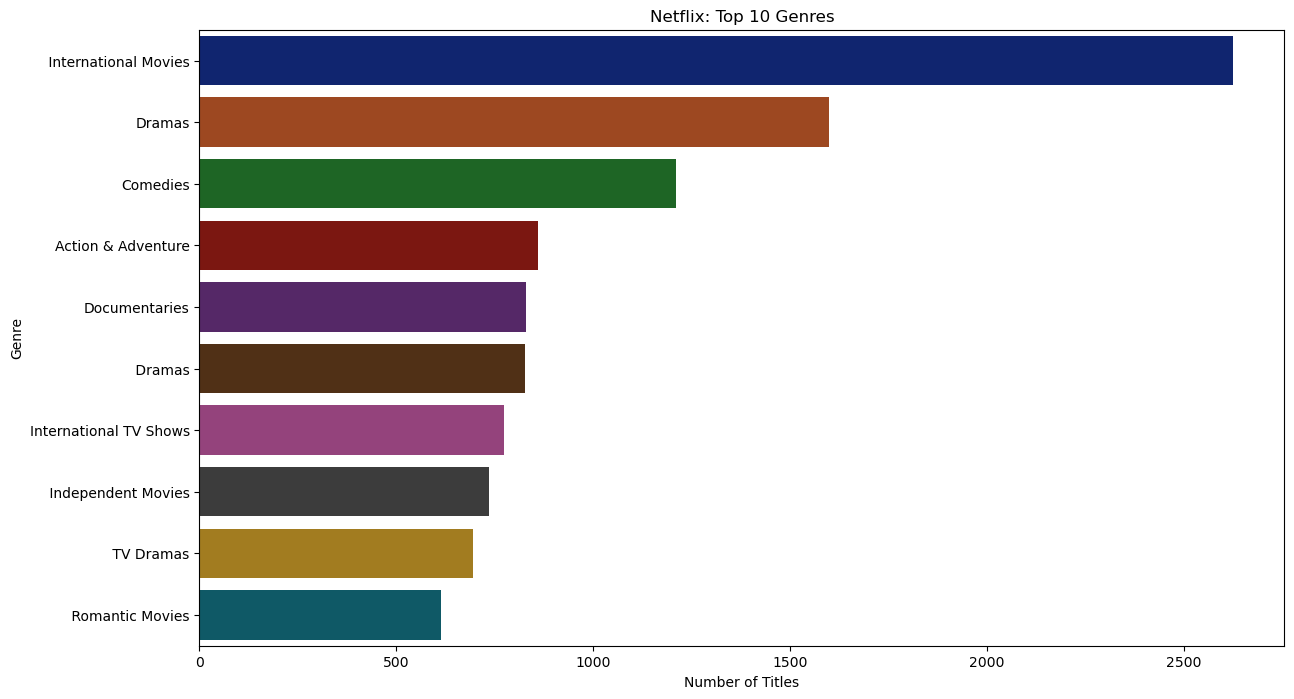

In [140]:
plt.figure(figsize=(14, 8))
sns.barplot(y=top_10_genre.index, x=top_10_genre.values, palette='dark')
plt.title('Netflix: Top 10 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


In [145]:
# Top 10 directors
top_10_directors = netflix['director'].value_counts().drop('No Director').head(10)
top_10_directors

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: count, dtype: int64

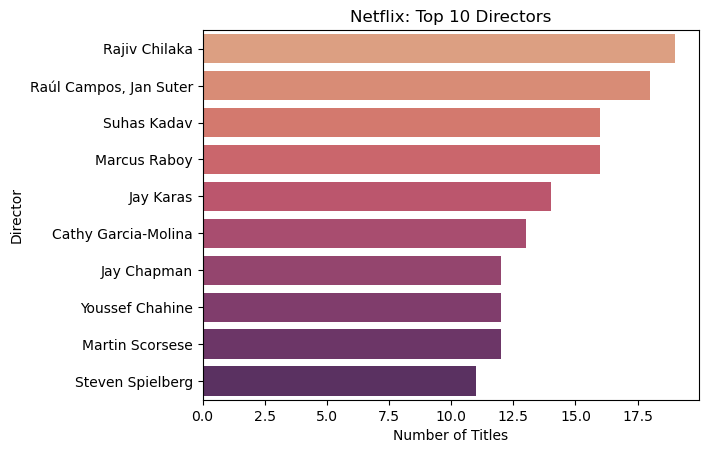

In [146]:
sns.barplot(y=top_10_directors.index, x=top_10_directors.values, palette='flare')
plt.title('Netflix: Top 10 Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director');

In [147]:
# Explore director information:
# movies created India

netflix[netflix['director'] == 'Rajiv Chilaka'].head(4)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",UnKnown,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",UnKnown,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",UnKnown,2021-07-22,2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",UnKnown,2021-07-22,2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...


In [148]:
# movies created in the Hispanic countries

netflix[netflix['director'] == 'Raúl Campos, Jan Suter'].head(4)


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
4750,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,2018-07-27,2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good..."
4782,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,2018-07-06,2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...
4809,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,2018-06-29,2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...
4850,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,2018-05-25,2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...


In [149]:
# British content

netflix[netflix['director'] == 'Alastair Fothergill'].head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
6811,TV Show,Frozen Planet,Alastair Fothergill,David Attenborough,"United Kingdom, United States, Spain, Germany,...",2016-01-28,2011,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",Go on a journey through the Arctic and Antarct...
7749,TV Show,Planet Earth: The Complete Collection,Alastair Fothergill,David Attenborough,United Kingdom,2015-04-22,2006,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This landmark series transports nature lovers ...
8215,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,2015-10-10,2001,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",David Attenborough narrates this definitive ex...


In [150]:
# United States have produced significant cmedy content.

netflix[netflix['listed_in'] == 'Comedies'].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
153,Movie,Janoskians: Untold and Untrue,Brett Weiner,"Jai Brooks, Luke Brooks, James Yammouni, Danie...",United States,2021-09-01,2016,TV-MA,88 min,Comedies,Follow the story of three Australian brothers ...
183,Movie,Welcome Home Roscoe Jenkins,Malcolm D. Lee,"Martin Lawrence, James Earl Jones, Joy Bryant,...",United States,2021-09-01,2008,PG-13,114 min,Comedies,R.J. travels to Georgia for his parents' 50th ...
343,Movie,Major Payne,Nick Castle,"Damon Wayans, Karyn Parsons, William Hickey, M...",United States,2021-08-01,1995,PG-13,97 min,Comedies,A hardened Marine is given his marching orders...
349,Movie,Poms,Zara Hayes,"Diane Keaton, Jacki Weaver, Pam Grier, Rhea Pe...","United Kingdom, United States",2021-08-01,2019,PG-13,91 min,Comedies,"After moving to a retirement community, loner ..."


# Type of content and its ratings on Netflix


In [151]:
# There are 15 ratings

netflix['rating'].nunique()

15

In [153]:
# Group the type of content and return the occurrence of each rating.

rating = netflix.groupby(['type'])['rating'].value_counts().to_frame()
rating


count
type    rating         
Movie   TV-MA      2062
        TV-14      1427
        R           797
        TV-PG       540
        PG-13       490
        PG          287
        TV-Y7       139
        TV-Y        131
        TV-G        126
        NR           75
        G            41
        TV-Y7-FV      5
        Unknown       5
        UR            3
        NC-17         3
TV Show TV-MA      1145
        TV-14       733
        TV-PG       323
        TV-Y7       195
        TV-Y        176
        TV-G         94
        NR            5
        Unknown       2
        R             2
        TV-Y7-FV      1
        PG-13         0
        PG            0
        NC-17         0
        UR            0
        G             0

In [154]:
# perform statistical calculations on the 'ratings' column,  using .agg() method

rating.groupby('rating')[['count']].agg(['sum', 'max', 'mean', 'min', 'std'])

count                                
           sum   max    mean   min         std
rating                                        
G           41    41    20.5     0   28.991378
NC-17        3     3     1.5     0    2.121320
NR          80    75    40.0     5   49.497475
PG         287   287   143.5     0  202.939646
PG-13      490   490   245.0     0  346.482323
R          799   797   399.5     2  562.149891
TV-14     2160  1427  1080.0   733  490.732106
TV-G       220   126   110.0    94   22.627417
TV-MA     3207  2062  1603.5  1145  648.416918
TV-PG      863   540   431.5   323  153.442172
TV-Y       307   176   153.5   131   31.819805
TV-Y7      334   195   167.0   139   39.597980
TV-Y7-FV     6     5     3.0     1    2.828427
UR           3     3     1.5     0    2.121320
Unknown      7     5     3.5     2    2.121320

In [ ]:
A countplot will show the distribution of the categorical data and frequency of each variable.

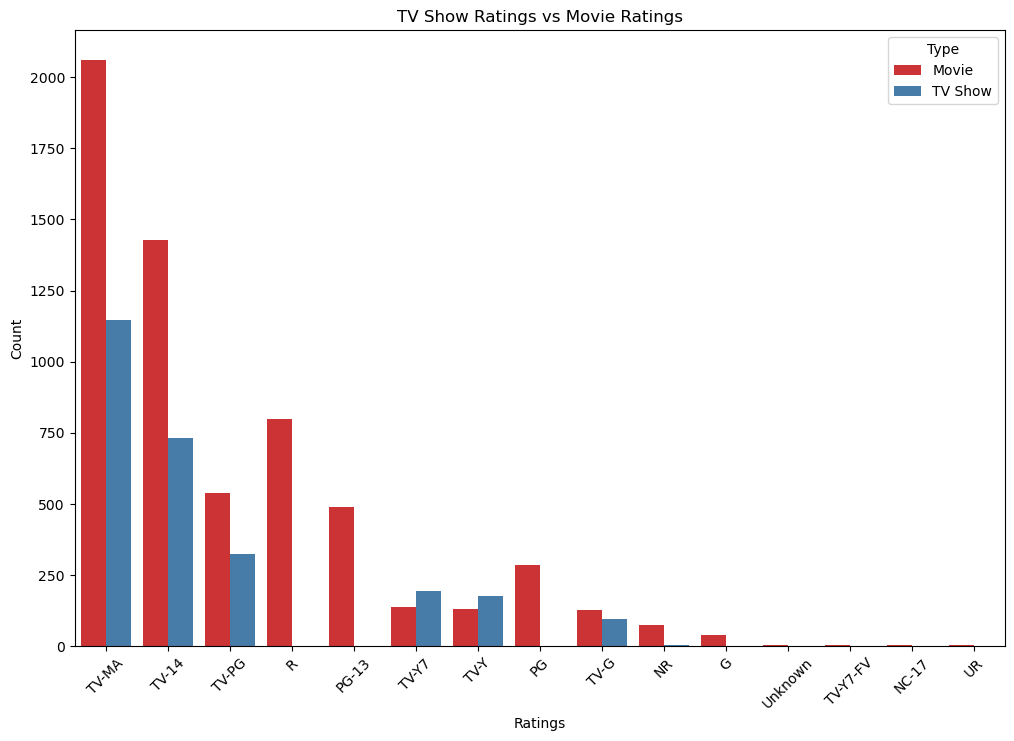

In [157]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', hue='type', data=netflix, order=netflix['rating'].value_counts().index, palette='Set1')
plt.title('TV Show Ratings vs Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


In [ ]:
A Histogram also shows the distribution - frequency of ratings and type of content.

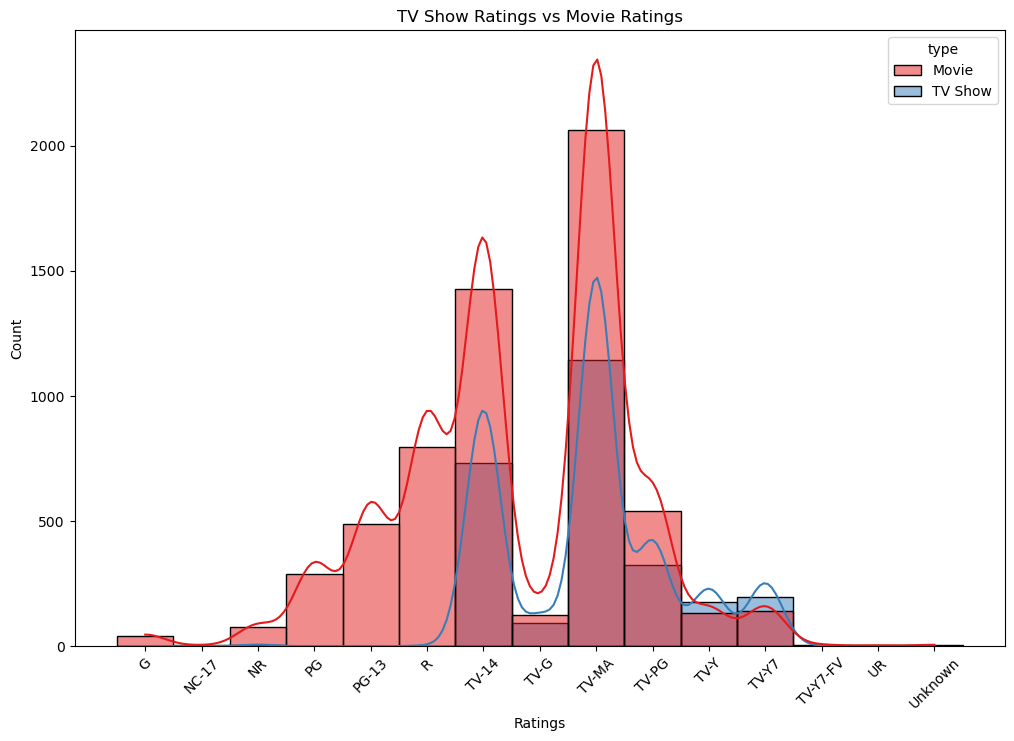

In [160]:
plt.figure(figsize=(12, 8))
sns.histplot(x='rating', hue='type', data=netflix, multiple='layer', palette='Set1', kde=True)
plt.title('TV Show Ratings vs Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Release Years

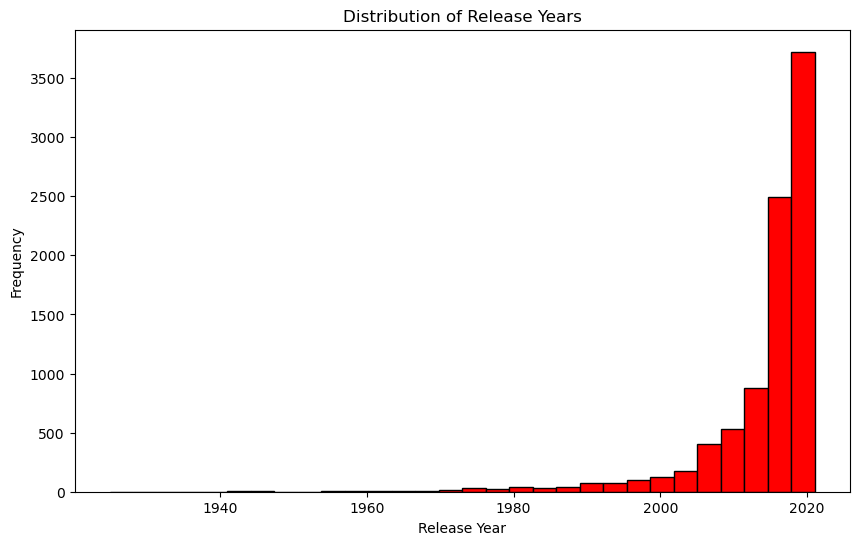

In [162]:
# Histogram for 'release_year'

plt.figure(figsize=(10, 6))
plt.hist(netflix['release_year'], bins=30, edgecolor='black', color='red')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


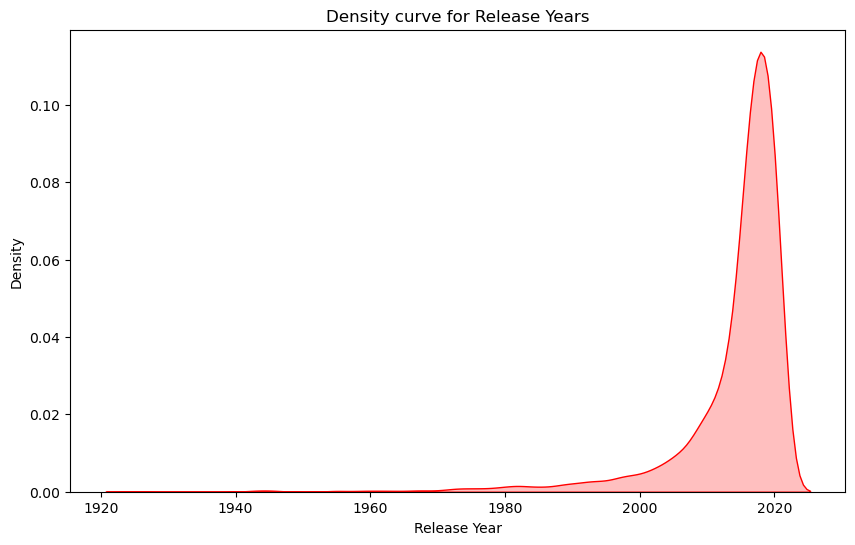

In [165]:
# Kde plot for 'release_year' - shows the distribution using a density curve

plt.figure(figsize=(10, 6))
sns.kdeplot(netflix['release_year'], fill=True, color='red')
plt.title('Density curve for Release Years')
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.show()


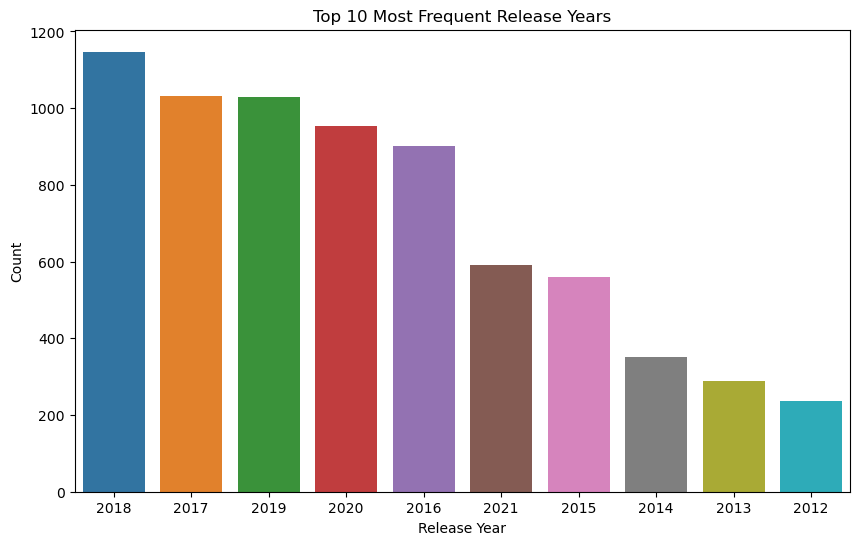

In [166]:
# Countplot for Top 10 'release years'.

plt.figure(figsize=(10, 6))
sns.countplot(data=netflix, x='release_year', order=netflix['release_year'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Frequent Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()